# The CIFAR-100 dataset

The CIFAR-100 dataset consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 500 training images and 100 testing images per class.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [7]:
y_train = y_train.reshape(50000)
y_train

array([19, 29,  0, ...,  3,  7, 73])

In [8]:
y_train.shape

(50000,)

In [9]:
#Scale data

X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0].shape

(32, 32, 3)

## ANN model

In [28]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(256, activation = 'relu'),
                         layers.Dense(512, activation = 'relu'),
                         layers.Dense(100, activation = 'softmax')
])

In [29]:
ann.compile(optimizer='RMSprop',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [30]:
history = ann.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
1563/1563 [==============================] - 18s 11ms/step - loss: 4.0659 - accuracy: 0.0752 - val_loss: 3.9442 - val_accuracy: 0.0964
Epoch 2/6
1563/1563 [==============================] - 18s 11ms/step - loss: 3.7537 - accuracy: 0.1251 - val_loss: 3.8589 - val_accuracy: 0.1192
Epoch 3/6
1563/1563 [==============================] - 19s 12ms/step - loss: 3.6412 - accuracy: 0.1452 - val_loss: 3.6739 - val_accuracy: 0.1485
Epoch 4/6
1563/1563 [==============================] - 17s 11ms/step - loss: 3.5759 - accuracy: 0.1579 - val_loss: 3.5842 - val_accuracy: 0.1621
Epoch 5/6
1563/1563 [==============================] - 18s 11ms/step - loss: 3.5317 - accuracy: 0.1644 - val_loss: 3.6429 - val_accuracy: 0.1617
Epoch 6/6
1563/1563 [==============================] - 17s 11ms/step - loss: 3.5050 - accuracy: 0.1716 - val_loss: 3.6033 - val_accuracy: 0.1571


In [31]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.6033 - accuracy: 0.1571


[3.603266477584839, 0.15710000693798065]

In [32]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               786688    
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dense_10 (Dense)            (None, 100)               51300     
                                                                 
Total params: 969,572
Trainable params: 969,572
Non-trainable params: 0
_________________________________________________________________


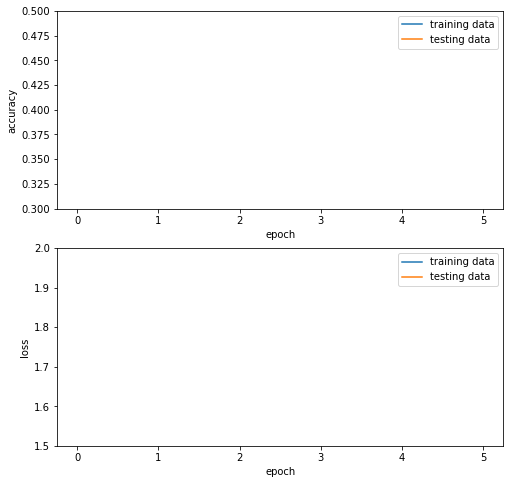

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='testing data')
plt.ylim([0.3,0.5])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='testing data')
plt.ylim([1.5,2])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [34]:
y_pred = ann.predict(X_test)

In [35]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.39      0.45      0.42       100
           1       0.26      0.30      0.28       100
           2       0.07      0.33      0.12       100
           3       0.10      0.06      0.08       100
           4       0.26      0.06      0.10       100
           5       0.20      0.09      0.12       100
           6       0.33      0.15      0.21       100
           7       0.19      0.06      0.09       100
           8       0.08      0.05      0.06       100
           9       0.17      0.04      0.06       100
          10       0.00      0.00      0.00       100
          11       0.08      0.03      0.04       100
          12       0.16      0.05      0.08       100
          13       0.09      0.03      0.04       100
          14       0.08      0.02      0.03       100
          15       0.08      0.05      0.06       100
          16       0.10      0.01      0.02       100
          17       0.15    

C:\Users\rache\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rache\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rache\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN model

In [44]:
cnn = models.Sequential([
                         layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', 
                                       activation='relu', input_shape=(32,32,3)),
                         layers.MaxPool2D((2,2)),

                         layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
                         layers.MaxPool2D((2,2)),
                        
    

                         layers.Flatten(),
                         layers.Dense(512, activation='relu'), layers.Dropout(0.1),
            
                         layers.Dense(100, activation='softmax')
])

In [45]:
cnn.compile(optimizer='RMSprop',
            loss='sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

In [46]:
cnn.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
1563/1563 [==============================] - 231s 147ms/step - loss: 3.4043 - accuracy: 0.2041 - val_loss: 2.8668 - val_accuracy: 0.2996
Epoch 2/6
1563/1563 [==============================] - 225s 144ms/step - loss: 2.5388 - accuracy: 0.3638 - val_loss: 2.7196 - val_accuracy: 0.3299
Epoch 3/6
1563/1563 [==============================] - 343s 219ms/step - loss: 2.1340 - accuracy: 0.4507 - val_loss: 2.3975 - val_accuracy: 0.4082
Epoch 4/6
1563/1563 [==============================] - 220s 141ms/step - loss: 1.8312 - accuracy: 0.5251 - val_loss: 2.8395 - val_accuracy: 0.3310
Epoch 5/6
1563/1563 [==============================] - 209s 134ms/step - loss: 1.5979 - accuracy: 0.5809 - val_loss: 2.8350 - val_accuracy: 0.4060
Epoch 6/6
1563/1563 [==============================] - 208s 133ms/step - loss: 1.4182 - accuracy: 0.6271 - val_loss: 2.8518 - val_accuracy: 0.3861


In [47]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_15 (Dense)            (None, 512)              